In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy.fft import fft
import os

In [4]:
LINR_30X_PATH = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.2184_linear/"
RCAN_30X_PATH = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.2184_linear_RCAN/"
SRCN_30X_PATH = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.2184_linear_SR/"

LINR_20X_PATH = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear/"
RCAN_20X_PATH = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_RCAN/"
SRCN_20X_PATH = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276_linear_SR/"

In [5]:
LINR_30X_IMGS = [LINR_30X_PATH + file for file in os.listdir(LINR_30X_PATH)]
RCAN_30X_IMGS = [RCAN_30X_PATH + file for file in os.listdir(RCAN_30X_PATH)]
SRCN_30X_IMGS = [SRCN_30X_PATH + file for file in os.listdir(SRCN_30X_PATH)]

LINR_20X_IMGS = [LINR_20X_PATH + file for file in os.listdir(LINR_20X_PATH)]
RCAN_20X_IMGS = [RCAN_20X_PATH + file for file in os.listdir(RCAN_20X_PATH)]
SRCN_20X_IMGS = [SRCN_20X_PATH + file for file in os.listdir(SRCN_20X_PATH)]

In [34]:
img_30 = cv.imread(LINR_30X_IMGS[5],cv.IMREAD_GRAYSCALE)
img_20 = cv.imread(LINR_20X_IMGS[5],cv.IMREAD_GRAYSCALE)
src_30 = cv.imread(SRCN_30X_IMGS[5],cv.IMREAD_GRAYSCALE)
src_20 = cv.imread(SRCN_20X_IMGS[5],cv.IMREAD_GRAYSCALE)
rcn_30 = cv.imread(RCAN_30X_IMGS[5],cv.IMREAD_GRAYSCALE)
rcn_20 = cv.imread(RCAN_20X_IMGS[5],cv.IMREAD_GRAYSCALE)

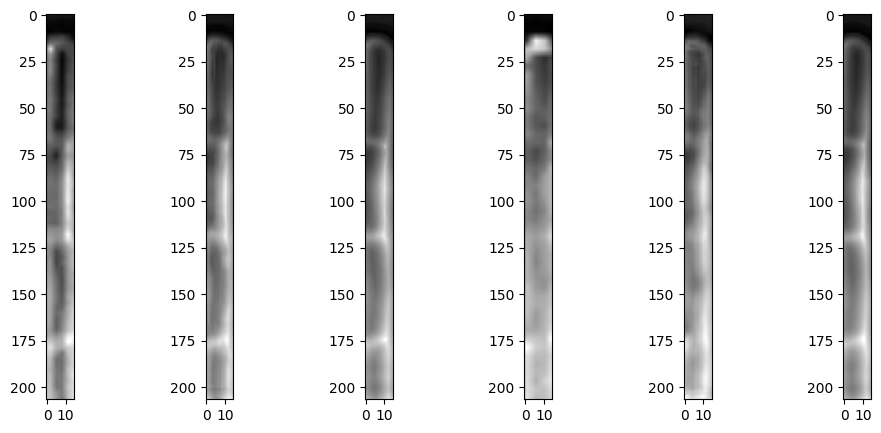

In [50]:
fig,axs = plt.subplots(1,6,figsize=[12,5])
axs[0].imshow(img_30[:,23:38],"gray")
axs[1].imshow(src_30[:,23:38],"gray")
axs[2].imshow(rcn_30[:,23:38],"gray")
axs[3].imshow(img_20[:,23:38],"gray")
axs[4].imshow(src_20[:,23:38],"gray")
axs[5].imshow(rcn_20[:,23:38],"gray")
plt.show()

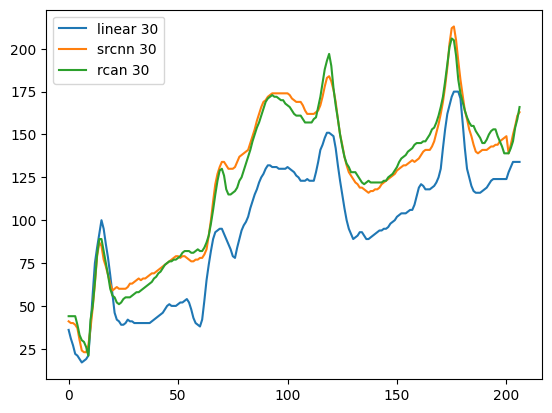

In [41]:
plt.plot(img_30[:,30],label="linear 30")
plt.plot(src_30[:,30],label="srcnn 30")
plt.plot(rcn_30[:,30],label="rcan 30")
plt.legend()
plt.show()

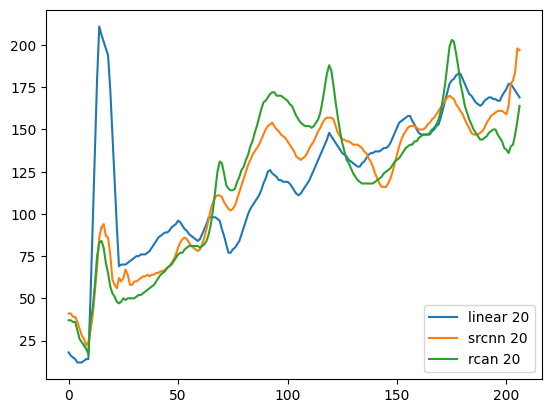

In [42]:
plt.plot(img_20[:,30],label="linear 20")
plt.plot(src_20[:,30],label="srcnn 20")
plt.plot(rcn_20[:,30],label="rcan 20")
plt.legend()
plt.show()

In [10]:
import numpy as np
from scipy.fft import fft, rfft
from scipy.fft import fftfreq, rfftfreq
import matplotlib.pyplot as plt

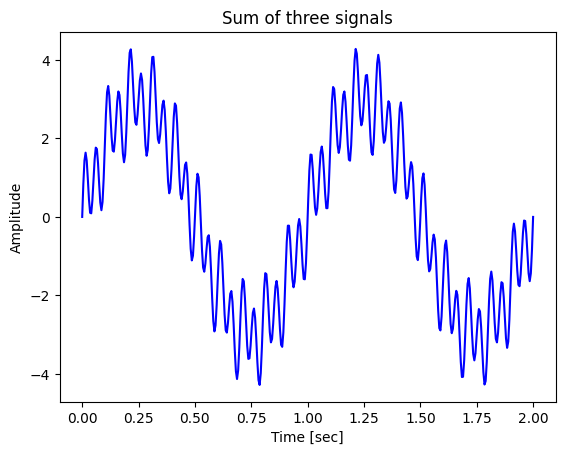

In [18]:
sine_1hz = 3*np.sin(np.linspace(0,2,400)*2*np.pi)
sine_20hz = np.sin(20*np.linspace(0,2,400)*2*np.pi)
sine_10hz = 0.5*np.sin(10*np.linspace(0,2,400)*2*np.pi)

# Sum the three signals to output the signal we want to analyze
signal = sine_1hz + sine_20hz + sine_10hz

# Plot the signal
plt.plot(np.linspace(0,2,400), signal, 'b')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.title('Sum of three signals')
plt.show()

In [51]:
signal = img_20[:,30]
signal1 = src_20[:,30]
signal2 = rcn_20[:,30]

In [52]:
fourier = fft(signal)
fourier1 = fft(signal1)
fourier2 = fft(signal2)
N = len(signal)
N1 = len(signal1)
N2 = len(signal2)
normalize = N/2
normalize1 = N1/2
normalize2 = N2/2

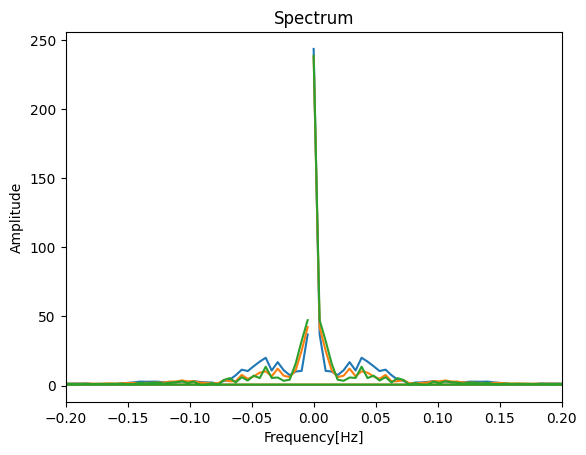

In [54]:
sampling_rate = 1 # It's used as a sample spacing
frequency_axis = fftfreq(N, d=1.0/sampling_rate)
norm_amplitude = np.abs(fourier)/normalize
frequency_axis1 = fftfreq(N1, d=1.0/sampling_rate)
norm_amplitude1 = np.abs(fourier1)/normalize1
frequency_axis2 = fftfreq(N1, d=1.0/sampling_rate)
norm_amplitude2 = np.abs(fourier2)/normalize2
# Plot the results
plt.plot(frequency_axis, norm_amplitude)
plt.plot(frequency_axis1, norm_amplitude1)
plt.plot(frequency_axis2, norm_amplitude2)
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.title('Spectrum')
plt.xlim(-0.2,0.2)
plt.show()